In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

In [11]:
# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size

        # Initialize weights and biases with random values
        self.weights = np.random.rand(output_size, input_size)
        self.biases = np.random.rand(output_size, 1)

    def forward(self, inputs):
        # Calculate the weighted sum of inputs and apply the sigmoid activation function
        return sigmoid(np.dot(self.weights, inputs) + self.biases)

    def train(self, inputs, targets, epochs, learning_rate):
        errors = []

        for epoch in range(epochs):
            total_error = 0

            for i in range(len(inputs[0])):
                # Forward pass
                input_vector = np.array([inputs[0][i], inputs[1][i]]).reshape(-1, 1)
                target_vector = np.array([targets[0][i], targets[1][i]]).reshape(-1, 1)

                output = self.forward(input_vector)

                # Calculate error
                error = target_vector - output
                total_error += 0.5 * np.sum(error**2)

                # Backpropagation
                output_derivative = sigmoid_derivative(output)
                delta = -error * output_derivative
                self.weights -= learning_rate * np.dot(delta, input_vector.T)
                self.biases -= learning_rate * delta

            # Calculate average error for the epoch
            average_error = total_error / len(inputs[0])
            errors.append(average_error)

            # Print training progress
            print(f"Epoch {epoch + 1}/{epochs}, Error: {average_error}")

        return errors

    def predict(self, inputs):
        # Make predictions using the trained network
        input_vector = np.array(inputs).reshape(-1, 1)
        return self.forward(input_vector)

Epoch 1/100, Error: 0.3470638420938161
Epoch 2/100, Error: 0.33377423818675894
Epoch 3/100, Error: 0.31847449384208704
Epoch 4/100, Error: 0.30115715759810546
Epoch 5/100, Error: 0.28217457246689515
Epoch 6/100, Error: 0.2623519892153393
Epoch 7/100, Error: 0.24289923592868257
Epoch 8/100, Error: 0.22505663516212632
Epoch 9/100, Error: 0.20966930181497734
Epoch 10/100, Error: 0.19699761094837445
Epoch 11/100, Error: 0.18683702016795362
Epoch 12/100, Error: 0.1787624435414776
Epoch 13/100, Error: 0.17231876392723283
Epoch 14/100, Error: 0.16711232880426657
Epoch 15/100, Error: 0.16283433095833122
Epoch 16/100, Error: 0.15925348502457934
Epoch 17/100, Error: 0.15619993810379715
Epoch 18/100, Error: 0.15354958811270147
Epoch 19/100, Error: 0.1512114975861212
Epoch 20/100, Error: 0.14911854777697459
Epoch 21/100, Error: 0.14722072961678634
Epoch 22/100, Error: 0.14548039000350435
Epoch 23/100, Error: 0.1438688709387519
Epoch 24/100, Error: 0.1423641245522468
Epoch 25/100, Error: 0.14094900

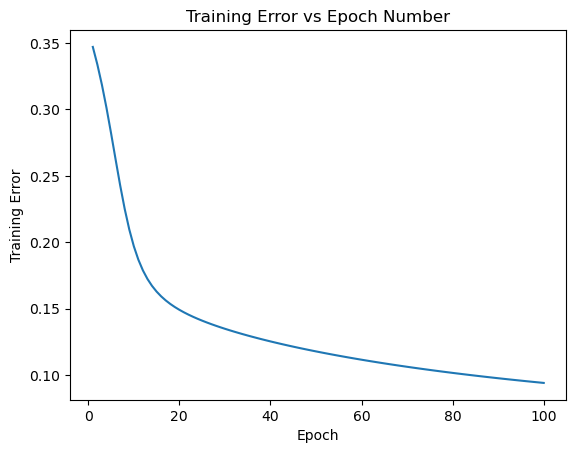

Epoch 1/3, Error: 0.09372920365175894
Epoch 2/3, Error: 0.0934030084790825
Epoch 3/3, Error: 0.09308067100259415


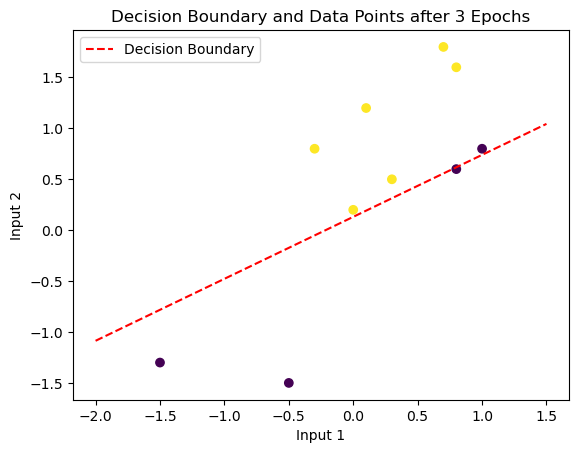

Epoch 1/10, Error: 0.09276212384307811
Epoch 2/10, Error: 0.09244730108109919
Epoch 3/10, Error: 0.09213613821582058
Epoch 4/10, Error: 0.09182857212560804
Epoch 5/10, Error: 0.09152454103030123
Epoch 6/10, Error: 0.09122398445504079
Epoch 7/10, Error: 0.09092684319555128
Epoch 8/10, Error: 0.09063305928478675
Epoch 9/10, Error: 0.09034257596085435
Epoch 10/10, Error: 0.09005533763613752


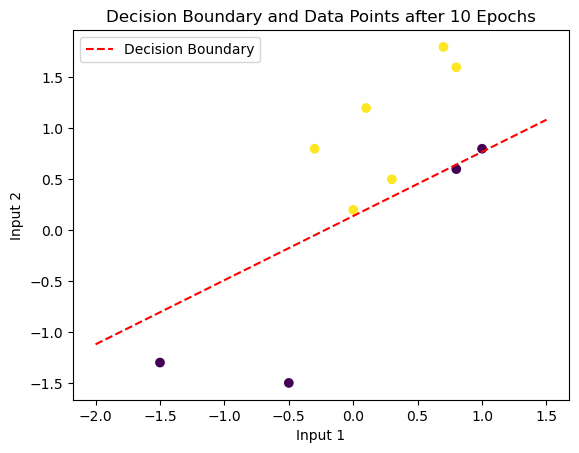

Epoch 1/100, Error: 0.08977128986754744
Epoch 2/100, Error: 0.08949037932783684
Epoch 3/100, Error: 0.08921255377791525
Epoch 4/100, Error: 0.08893776204011007
Epoch 5/100, Error: 0.08866595397232192
Epoch 6/100, Error: 0.0883970804430268
Epoch 7/100, Error: 0.08813109330708097
Epoch 8/100, Error: 0.08786794538228855
Epoch 9/100, Error: 0.08760759042669364
Epoch 10/100, Error: 0.08734998311656263
Epoch 11/100, Error: 0.08709507902502417
Epoch 12/100, Error: 0.08684283460133715
Epoch 13/100, Error: 0.08659320715075844
Epoch 14/100, Error: 0.0863461548149845
Epoch 15/100, Error: 0.08610163655314296
Epoch 16/100, Error: 0.08585961212331109
Epoch 17/100, Error: 0.08562004206454024
Epoch 18/100, Error: 0.08538288767936661
Epoch 19/100, Error: 0.08514811101678918
Epoch 20/100, Error: 0.0849156748556982
Epoch 21/100, Error: 0.0846855426887368
Epoch 22/100, Error: 0.08445767870658125
Epoch 23/100, Error: 0.08423204778262441
Epoch 24/100, Error: 0.08400861545804929
Epoch 25/100, Error: 0.083787

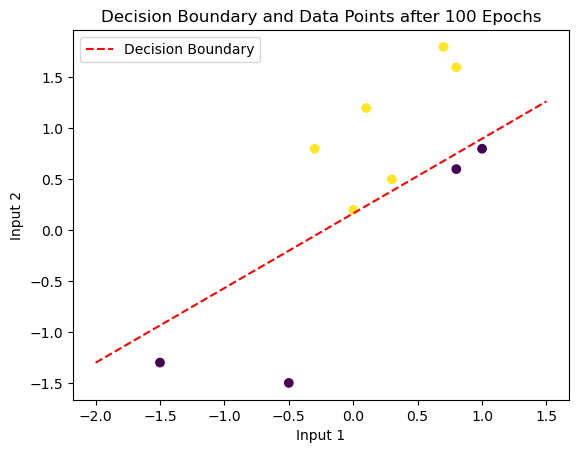

In [12]:
# Define the input matrix and target values
X = np.array([[0.1, 0.7, 0.8, 0.8, 1.0, 0.3, 0.0, -0.3, -0.5, -1.5],
              [1.2, 1.8, 1.6, 0.6, 0.8, 0.5, 0.2, 0.8, -1.5, -1.3]])
Y = np.array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
              [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

# Define hyperparameters
epochs = 100
learning_rate = 0.1

# Create and train the neural network
nn = NeuralNetwork(input_size=2, output_size=2)
training_errors = nn.train(X, Y, epochs, learning_rate)

# Plot training error vs epoch number
plt.plot(range(1, epochs + 1), training_errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.title('Training Error vs Epoch Number')
plt.show()

# Plot decision boundary and data points after 3, 10, and 100 epochs
for epoch in [3, 10, 100]:
    nn.train(X, Y, epoch, learning_rate)
    plt.scatter(X[0], X[1], c=Y[0], cmap='viridis')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title(f'Decision Boundary and Data Points after {epoch} Epochs')
    x_vals = np.linspace(min(X[0]) - 0.5, max(X[0]) + 0.5, 100)
    y_vals = (-nn.weights[0][0] * x_vals - nn.biases[0]) / nn.weights[0][1]
    plt.plot(x_vals, y_vals, '--', color='red', label='Decision Boundary')
    plt.legend()
    plt.show()
